# Semana 3 - Atividade 1 - Marcelo Cruz

Análise de Avistamento de OVNIs

https://www.kaggle.com/datasets/NUFORC/ufo-sightings

## Importar bibliotecas

In [1]:
import pandas as pd # utilizado para ler e analisar os dados
import numpy as np # utilizado para manipular os dados
import matplotlib.pyplot as plt # utilizada para visualização dos dados
import seaborn as sns # utilizada para visualização dos dados
import statistics as sts # utilizada para analisar os dados

## Carregar os dados

In [2]:
ufo_data = pd.read_csv('/content/ufodata.csv', on_bad_lines='skip', na_values = ['UNKNOWN','UNK'], 
                        na_filter = True, 
                        skip_blank_lines = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Breve olhada nos dados

In [3]:
ufo_data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## Verificar se há valores faltantes
O Python representa valores faltantes como NaN.

Vamos ver se encontramos valores assim nos dados.

Para que possamos verificar se existem valores faltantes (NaN) no data set,
utilizamos o método isnull(), que retorna True ou False para cada célula.
Porém, seria inviável vermos se todos os valores correspondem a True ou False.
Para facilitar nosso trabalho, podemos somar estes resultados utilizando 
o método sum().

In [4]:
ufo_data.isnull().sum()

datetime                    0
city                        0
state                    7409
country                 12365
shape                    2922
duration (seconds)          2
duration (hours/min)     3019
comments                   35
date posted                 0
latitude                    0
longitude                   0
dtype: int64

Podemos ver que 4 atributos se destacam, entre eles estão state, country, shape e duration (hours/min). 

Vamos vê-los de forma gráfica.


In [5]:
ufo_data.groupby(['state']).size()

state
ab     374
ak     395
al     763
ar     732
az    2938
      ... 
wi    1426
wv     539
wy     228
yk       7
yt      14
Length: 68, dtype: int64

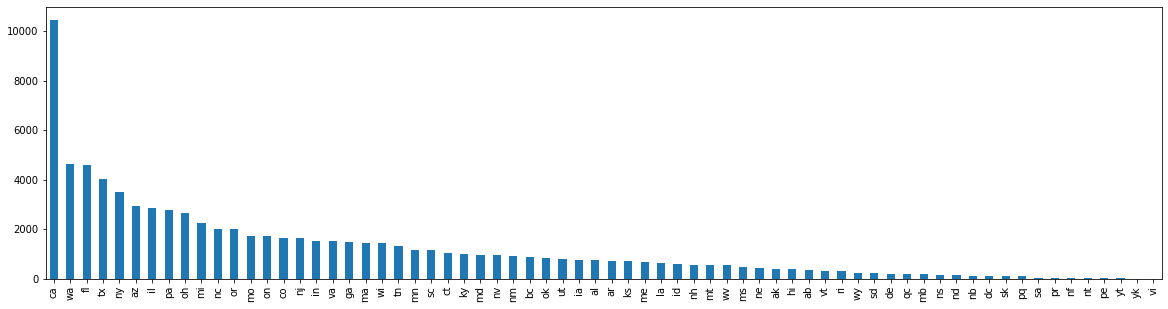

In [6]:
ufo_data['state'].value_counts().plot.bar(figsize=(20,5))

Podemos ver que o estado em que mais registraram aparições foi a California.

In [7]:
ufo_data.groupby(['country']).size()

country
au      593
ca     3266
de      112
gb     2050
us    70293
dtype: int64

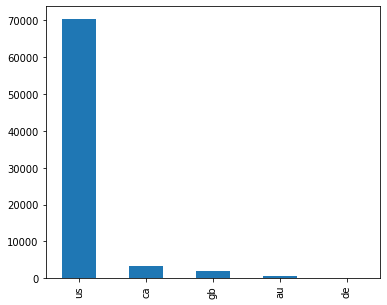

In [8]:
ufo_data['country'].value_counts().plot.bar(figsize=(6,5))

Podemos ver que o país em que mais registraram aparições foi a Estados Unidos, disparado.

In [9]:
ufo_data.groupby(['shape']).size()

shape
changed          1
changing      2140
chevron       1007
cigar         2241
circle        8453
cone           367
crescent         2
cross          265
cylinder      1382
delta            8
diamond       1308
disk          6005
dome             1
egg            845
fireball      6562
flare            1
flash         1472
formation     2657
hexagon          1
light        17872
other         6247
oval          4119
pyramid          1
rectangle     1418
round            2
sphere        5755
teardrop       817
triangle      8489
unknown       6319
dtype: int64

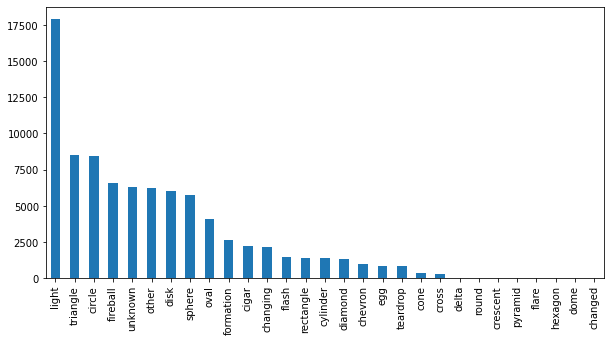

In [10]:
ufo_data['shape'].value_counts().plot.bar(figsize=(10,5))

Podemos ver que o formato que mais foi visto é o de luz, seguido por triângulo.

## Tratar tipos de dados errados

In [11]:
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
        'comments', 'date posted', 'latitude',
       'longitude ']

ufo_data = pd.DataFrame(data=ufo_data, columns=ufo_subcols)

# dropar valores null
ufo_data = ufo_data.dropna(thresh=8)

# reiniciar os indices
ufo_data = ufo_data.reset_index(drop=True)

# EXTRACT LATITUDES #
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'],errors = 'coerce')  # latitudes as numerics
ufo_data['longitude '] = pd.to_numeric(ufo_data['longitude '], errors='coerce')

# CHANGE VARIABLES UFO_DATE IN SCRIPT 1-1-18
ufo_date = ufo_data.datetime.str.replace('24:00', '00:00')  # clean illegal values
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')  # now in datetime

ufo_data['datetime'] = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M')

## Frequência de avistamento de OVNIs (1949 - 2013)

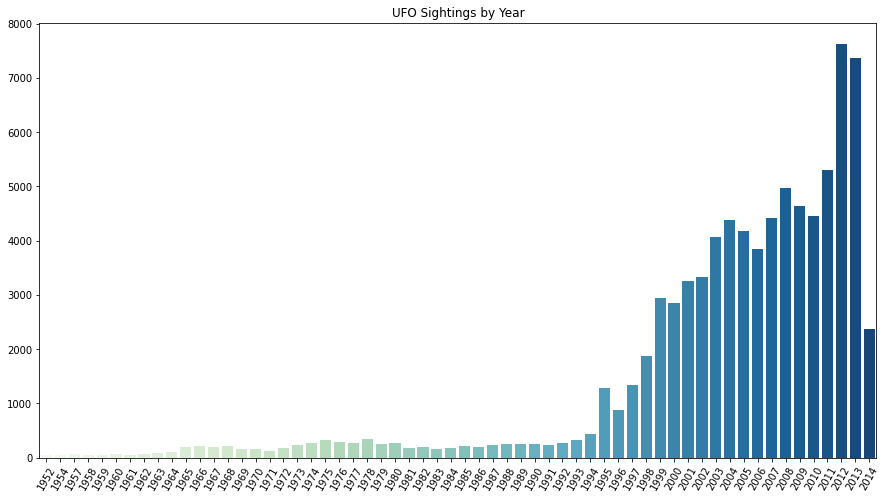

In [12]:
ufo_yr = ufo_date.dt.year  # somente o ano

years_data = ufo_yr.value_counts()
years_index = years_data.index  
years_values = years_data.to_numpy()

plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "GnBu")

## Em qual época mais ocorre avistamento?

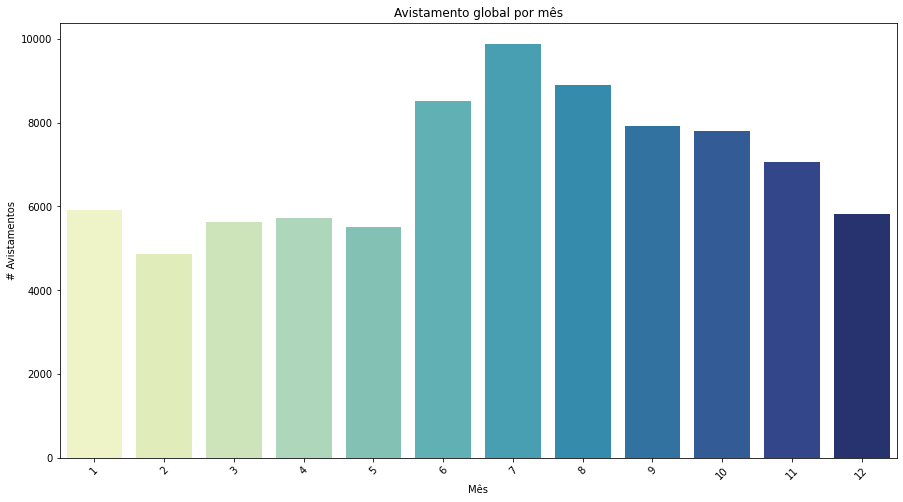

In [15]:
m_cts = (ufo_data['datetime'].dt.month.value_counts()).sort_index()
m_ctsx = m_cts.index
m_ctsy = m_cts.to_numpy()
f, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=m_ctsx, y=m_ctsy, palette="YlGnBu")
ax.set_title('Avistamento global por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('# Avistamentos')
plt.xticks(rotation=45)
plt.show()